<a href="https://colab.research.google.com/github/musinaa/titanic_prediction/blob/eda/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

In [20]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [21]:
# Drop irrelevant columns and missing values
titanic.drop(['embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive'], axis=1, inplace=True)
titanic.dropna(inplace=True)

In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,male,22.0,1,0,7.2500,False
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,True
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,False
886,0,2,male,27.0,0,0,13.0000,True
887,1,1,female,19.0,0,0,30.0000,True
889,1,1,male,26.0,0,0,30.0000,True


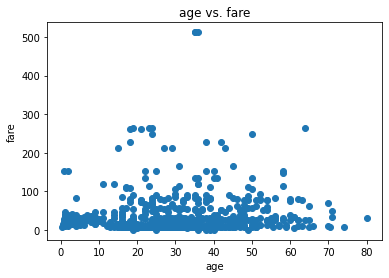

In [24]:
# Create scatterplot of Age vs. Fare
plt.scatter(titanic['age'], titanic['fare'])
plt.title('age vs. fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

In [25]:
# Save scatter plot as a PDF file
plt.savefig('scatterplot.pdf', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [27]:
# Get current working directory
current_dir = os.getcwd()
print(current_dir)

/content


In [14]:
# Convert categorical columns to numerical
titanic['sex'] = titanic['sex'].map({'female': 0, 'male': 1}).astype(int)

In [15]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,1,22.0,1,0,7.2500,False
1,1,1,0,38.0,1,0,71.2833,False
2,1,3,0,26.0,0,0,7.9250,True
3,1,1,0,35.0,1,0,53.1000,False
4,0,3,1,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,False
886,0,2,1,27.0,0,0,13.0000,True
887,1,1,0,19.0,0,0,30.0000,True
889,1,1,1,26.0,0,0,30.0000,True


In [16]:
# Split the data into training and testing sets
X = titanic.drop('survived', axis=1)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions on the test set and calculate accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7622377622377622
